In [58]:
import gaussian_mixture_anomaly_detection as ad
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
import numpy as np
import utils
import models
import ewma

reload(ad)
reload(utils)
reload(models)
reload(ewma)
%matplotlib inline

In [2]:
eff_train = utils.read_ts('data/eff_train/eff_train1.csv')
eff_train = utils.bad_to_mean(eff_train)
eff_train.head()

/Users/alex/Desktop/GlobalChangersSibur/utils.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good


,tag,timestamp,value,quality
0,Efficiency,01.10.2016 0:00,16137.70,Good
1,Efficiency,01.10.2016 0:00,16060.55,Good
2,Efficiency,01.10.2016 0:00,16633.79,Good
3,Efficiency,01.10.2016 0:00,17578.13,Good
4,Efficiency,01.10.2016 0:00,17331.05,Good


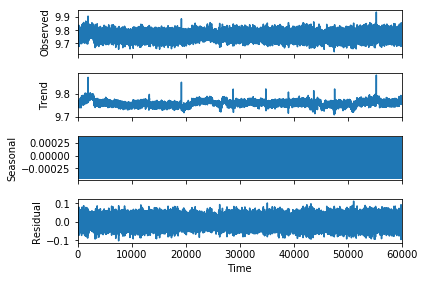

6000


,trend,season,diff
30,9.763258,-0.000435,0.000724
31,9.753591,-0.000168,-0.002821
32,9.745749,0.000001,0.001151
33,9.754862,0.000203,0.001026


In [5]:
origin_ts = eff_train[' value'][40000:100000].values
# plt.plot(range(len(origin_ts)), origin_ts)
lag_to_drop=10
df = utils.get_expanded_features(origin_ts,lag_to_drop=10,plot=True)
dropped_origin = utils.get_dropped(origin_ts, lag=10)
print(len(df))
df.loc[30:33]

In [81]:
from sklearn.linear_model import LogisticRegression
def get_log_reg_score(target, model=LogisticRegression(),X_length = 50):
    diff_dropped = df['diff'].values
    print('test----------------------------train')
    print('diff', models.train_test_score(model, np.abs(diff_dropped), target, length=X_length))

/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
100%|██████████| 1/1 [00:05<00:00,  5.72s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=10,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


Start probabilities memorization


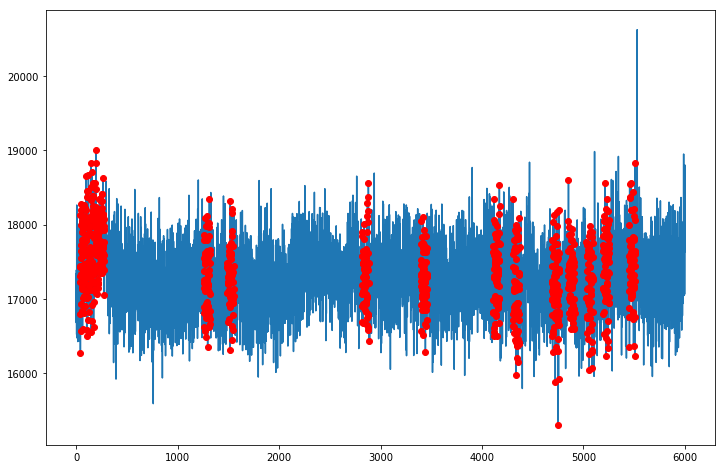

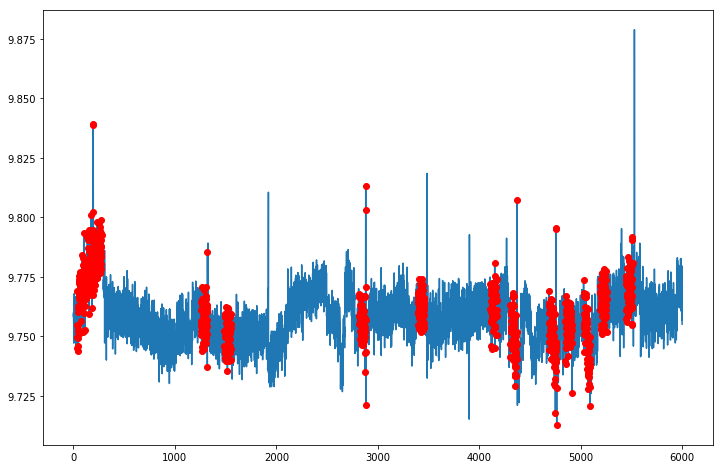

test----------------------------train
diff (0.60810215539740542, 0.67766696902338774)
None
CPU times: user 53.5 s, sys: 981 ms, total: 54.5 s
Wall time: 55 s


In [15]:
%%time
# 1 hour predictions
targets = utils.get_targets_with_mixture(df,horizont=6 * 11,top=0.005)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(get_log_reg_score(targets))

/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
100%|██████████| 1/1 [00:06<00:00,  6.73s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(ignore_na=False,com=10,adjust=True,min_periods=0).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


Start probabilities memorization


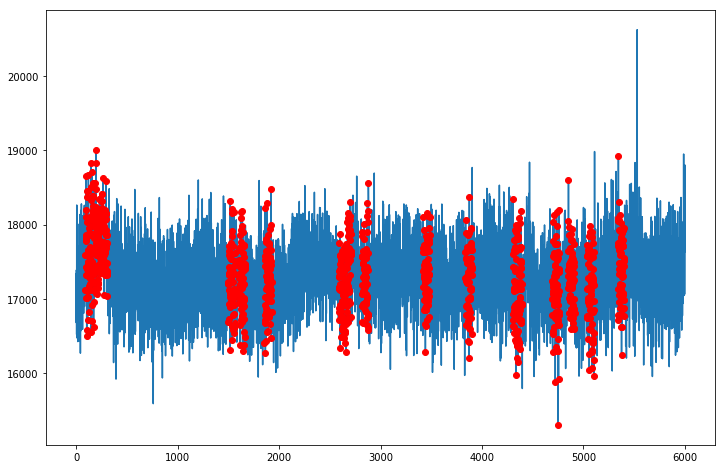

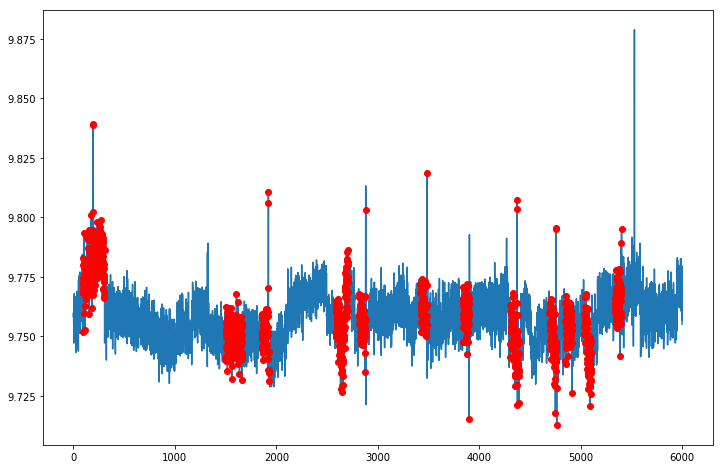

test----------------------------train
diff (0.56268833405079643, 0.56878742715903063)
None
CPU times: user 51.5 s, sys: 1.01 s, total: 52.5 s
Wall time: 52.8 s


In [16]:
%%time
# 1 hour predictions
targets = utils.get_targets_with_mixture(df[['trend']],horizont=6 * 11,top=0.005)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(get_log_reg_score(targets))

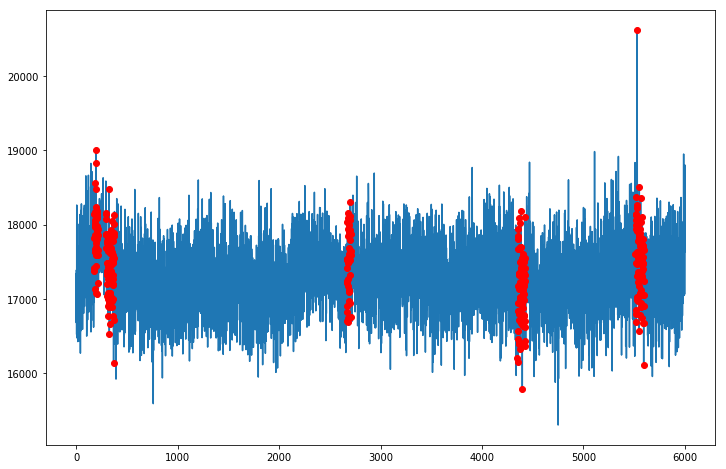

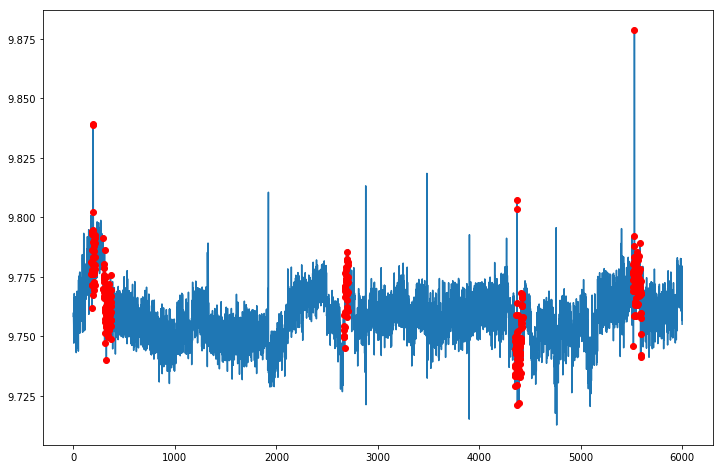

test----------------------------train
diff (0.53660053743821123, 0.66103371286274026)
None
CPU times: user 879 ms, sys: 25.6 ms, total: 905 ms
Wall time: 909 ms


In [60]:
%%time
df[['trend']].shape
dropped_origin.shape
targets = ewma.get_target_future(df[['trend']],horizont=6*11, top=0.1, halflife=50)
utils.plot_with_target(dropped_origin, targets)
utils.plot_with_target(df['trend'].values, targets)
print(get_log_reg_score(targets))

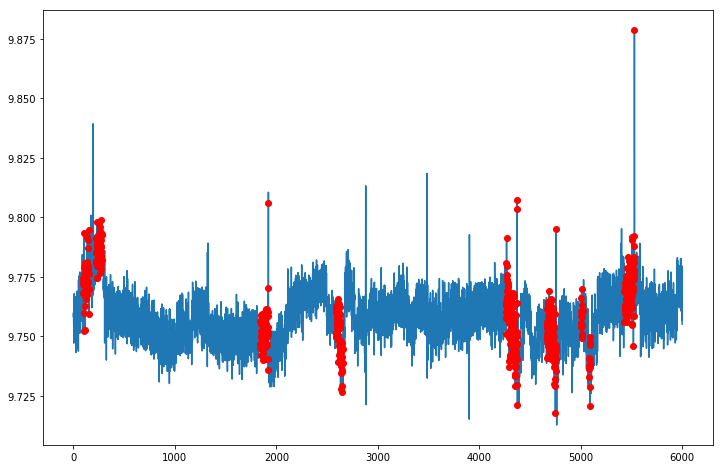

test----------------------------train
diff (0.68681050970467827, 0.69311153689426608)
None


In [78]:
values = df['trend'].values
targets = ewma.get_ma_target(df,window=50)
utils.plot_with_target(values, target)
print(get_log_reg_score(targets))

# End to end

### Efficiency

Reading data from "data/eff_train/eff_train1.csv"...
TSA decomposition...

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)



lag_to_drop 70
Start probabilities memorization

100%|██████████| 1/1 [00:06<00:00,  6.29s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=9,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


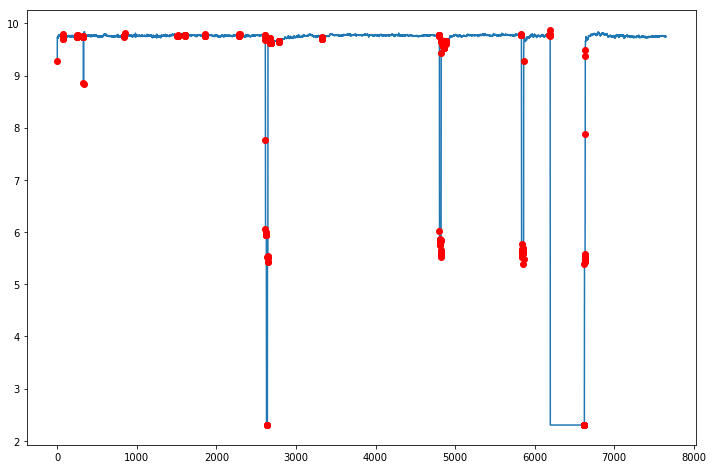

test---------------------------train
(0.62308846302748744, 0.75818192608669854)
CPU times: user 1min 2s, sys: 1.47 s, total: 1min 3s
Wall time: 1min 4s


In [54]:
%%time 
score = utils.end_to_end('data/eff_train/eff_train1.csv',plot=True)
print('test---------------------------train')
print(score)

Reading data from "data/qual_train/qual_train1.csv"...
TSA decomposition...
lag_to_drop 1
Start probabilities memorization

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
100%|██████████| 1/1 [00:01<00:00,  1.90s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=1,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


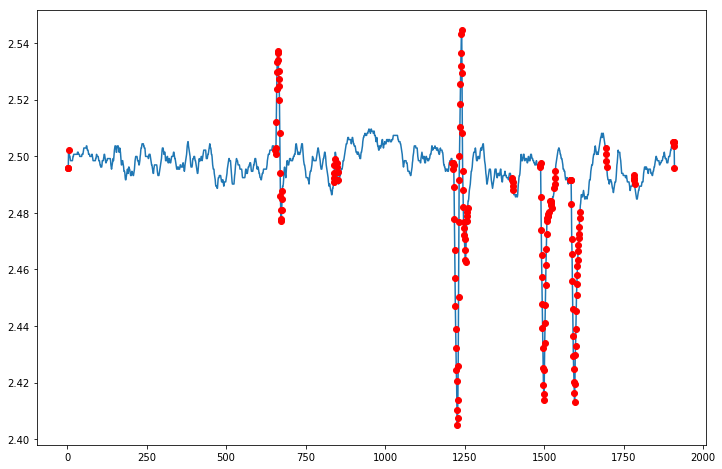

test---------------------------train
(0.81886768923805953, 0.59874591302011027)


In [59]:
score = utils.end_to_end('data/qual_train/qual_train1.csv',plot=True,lag_to_drop=1,horizont=4,halflife=1,X_length=10,top=0.05)
print('test---------------------------train')
print(score)

Reading data from "data/energy_cons_train/Energy_cons_train1.csv"...
TSA decomposition...

/Users/alex/Desktop/GlobalChangersSibur/utils.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[' value'][df[' quality'] != 'Good'] = mean_good
/Users/alex/anaconda/lib/python3.5/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converged. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)



lag_to_drop 20
Start probabilities memorization

100%|██████████| 1/1 [00:02<00:00,  2.41s/it]
/Users/alex/Desktop/GlobalChangersSibur/gaussian_mixture_anomaly_detection.py:197: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(min_periods=0,com=10,adjust=True,ignore_na=False).mean()
  return np.array([np.array(pd.ewma(series, halflife)).reshape(-1) for series in frames])


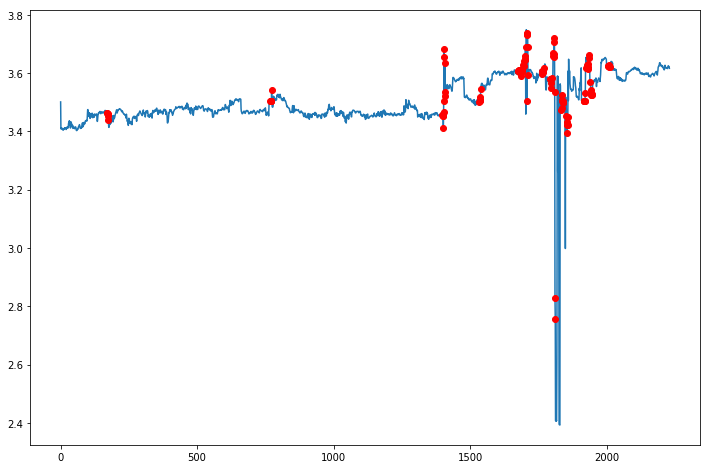

train---------------------------test
(0.62884477825464946, 0.58505349943924101)


In [61]:
score = utils.end_to_end('data/energy_cons_train/Energy_cons_train1.csv',
                         plot=True,
                         lag_to_drop=20,
                         horizont=2*60,
                         halflife = 10,
                         X_length=80,
                         top=0.01)
print('train---------------------------test')
print(score)